In [1]:
!ls ./sentiment-analysis-using-bi-gru

'ls' is not recognized as an internal or external command,
operable program or batch file.


## Declare Library

In [2]:
# import cv2
import numpy as np
import pandas as pd
from string import punctuation
from matplotlib import pyplot as plt

from collections import Counter
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

import re
from nltk.stem import WordNetLemmatizer

import pickle

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\R4P\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\R4P\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Set Numpy Random Seed

In [3]:
RND_SEED = pickle.load(open("numpy_random_seed", 'rb'))
np.random.set_state(RND_SEED)

## Load From Google Drive

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

url_root = '.'
# Tokopedia - 797450
# Instagram - 568058
appName = 'Instagram'
appId = 568058

## Process Data From Google Drive

In [5]:
url_topic_txt = url_root + '/Topics/' + appName +'/README.txt'
url_topics = url_root + '/Topics'

In [6]:
dict_topics = {}
topics = []

with open(url_topic_txt, 'r') as f:
    for line in f:
      topic, num = line.split('-')
      num = num.replace('\n', '')
      dict_topics[num] = topic
      topics.append(topic)

dict_topics

{'34': 'Satisfied Users',
 '11': 'Bugs',
 '15': 'Design & UX',
 '12': 'Camera & Photos',
 '42': 'Use cases',
 '35': 'Security & Accounts',
 '43': 'Video',
 '19': 'Dissatified Users',
 '31': 'Performance',
 '17': 'Feature Requests'}

In [7]:
all_csv = []
for num_topic, topic in dict_topics.items():
  directory = url_topics + '/' + appName + '/' + str(num_topic)
  print(directory)
  for i in range(1, 51):
    try:
      url_csv = directory + '/AppId'+ str(appId) + 'From2019-05-29To2020-05-29_' + str(i) + '.json.csv'
      with open(url_csv, 'r') as f:
        all_csv.append(url_csv)
    except:
      break

all_csv

./Topics/Instagram/34
./Topics/Instagram/11
./Topics/Instagram/15
./Topics/Instagram/12
./Topics/Instagram/42
./Topics/Instagram/35
./Topics/Instagram/43
./Topics/Instagram/19
./Topics/Instagram/31
./Topics/Instagram/17


['./Topics/Instagram/34/AppId568058From2019-05-29To2020-05-29_1.json.csv',
 './Topics/Instagram/34/AppId568058From2019-05-29To2020-05-29_2.json.csv',
 './Topics/Instagram/34/AppId568058From2019-05-29To2020-05-29_3.json.csv',
 './Topics/Instagram/34/AppId568058From2019-05-29To2020-05-29_4.json.csv',
 './Topics/Instagram/34/AppId568058From2019-05-29To2020-05-29_5.json.csv',
 './Topics/Instagram/34/AppId568058From2019-05-29To2020-05-29_6.json.csv',
 './Topics/Instagram/34/AppId568058From2019-05-29To2020-05-29_7.json.csv',
 './Topics/Instagram/34/AppId568058From2019-05-29To2020-05-29_8.json.csv',
 './Topics/Instagram/34/AppId568058From2019-05-29To2020-05-29_9.json.csv',
 './Topics/Instagram/34/AppId568058From2019-05-29To2020-05-29_10.json.csv',
 './Topics/Instagram/34/AppId568058From2019-05-29To2020-05-29_11.json.csv',
 './Topics/Instagram/34/AppId568058From2019-05-29To2020-05-29_12.json.csv',
 './Topics/Instagram/34/AppId568058From2019-05-29To2020-05-29_13.json.csv',
 './Topics/Instagram/

In [8]:
# combined_csv = pd.concat([pd.read_csv(f, encoding='latin-1') for f in all_csv ])

read_csvs = []
topic = ''
cnt = 0
length = 0

for index, url in enumerate(all_csv):
  df = pd.read_csv(url, encoding='latin-1')
  arr_url = url.split('/')
  temp_topic = dict_topics[str(arr_url[3])]

  if topic != temp_topic:
    if ((temp_topic == 'Dissatified Users' or temp_topic == 'Satisfied Users') and topic == 'Satisfication'):
      length = length
    else:
      print('====================================================')
      print('Topic: ' + topic)
      print('Progress: ' + str(cnt) + '/' + str(len(all_csv)))
      print('Total Data: ' +  str(length))
      print('====================================================')

  if topic != temp_topic :
    if temp_topic == 'Dissatified Users' or temp_topic == 'Satisfied Users':
      topic = 'Satisfication'
    else:
      topic = temp_topic
      length = 0
  df['Topic'] = topic
  read_csvs.append(df)
  cnt += 1
  length += len(df)

  if index + 1 == len(all_csv):
    print('====================================================')
    print('Topic: ' + topic)
    print('Progress: ' + str(len(all_csv)) + '/' + str(len(all_csv)))
    print('Total Data: ' +  str(length))
    print('====================================================')
  



Topic: 
Progress: 0/500
Total Data: 0
Topic: Satisfication
Progress: 50/500
Total Data: 41713
Topic: Bugs
Progress: 100/500
Total Data: 41383
Topic: Design & UX
Progress: 150/500
Total Data: 38508
Topic: Camera & Photos
Progress: 200/500
Total Data: 40583
Topic: Use cases
Progress: 250/500
Total Data: 41462
Topic: Security & Accounts
Progress: 300/500
Total Data: 42825
Topic: Video
Progress: 350/500
Total Data: 36335
Topic: Satisfication
Progress: 400/500
Total Data: 75877
Topic: Performance
Progress: 450/500
Total Data: 42287
Topic: Feature Requests
Progress: 500/500
Total Data: 29656


### Merge Satisfied Users and Dissatified Users

In [9]:
new_dict_topics = dict_topics
del new_dict_topics['19']
del new_dict_topics['34']
new_dict_topics['-1'] = 'Satisfication'
print(new_dict_topics)

new_topics = topics
new_topics.remove('Satisfied Users')
new_topics.remove('Dissatified Users')
new_topics.append('Satisfication')
print(new_topics)

{'11': 'Bugs', '15': 'Design & UX', '12': 'Camera & Photos', '42': 'Use cases', '35': 'Security & Accounts', '43': 'Video', '31': 'Performance', '17': 'Feature Requests', '-1': 'Satisfication'}
['Bugs', 'Design & UX', 'Camera & Photos', 'Use cases', 'Security & Accounts', 'Video', 'Performance', 'Feature Requests', 'Satisfication']


In [10]:
SENTIMENT_POSITIVE = 1
SENTIMENT_NEGATIVE = 0
SENTIMENT_NEUTRAL = 2
SENTIMENT_MIXED = 3

In [11]:
combined_csv = pd.concat(read_csvs)
combined_csv = combined_csv.rename(columns={'Sentiment(From Appbot)': 'Sentiment'})
# combined_csv['content'] = combined_csv['content'].apply(lambda x: x.lower())
# combined_csv['content'] = combined_csv['content'].apply(lambda x: ''.join([c for c in x if c not in punctuation]))
combined_csv['Sentiment'] = combined_csv['Sentiment'].map({'neutral': SENTIMENT_NEUTRAL, 'negative': SENTIMENT_NEGATIVE, 'mixed': SENTIMENT_MIXED, 'positive': SENTIMENT_POSITIVE})
combined_csv = combined_csv.reset_index(drop=True)
combined_csv

rating                      time software_type  \
0            5  2020-05-29T23:59:58.000Z   google_play   
1            5  2020-05-29T23:59:56.000Z   google_play   
2            5  2020-05-29T23:59:32.000Z   google_play   
3            5  2020-05-29T23:59:24.000Z   google_play   
4            5  2020-05-29T23:58:29.000Z   google_play   
...        ...                       ...           ...   
394289       1  2019-10-24T21:58:02.000Z   google_play   
394290       4  2019-10-24T21:55:43.000Z   google_play   
394291       3  2019-10-24T21:36:52.000Z   google_play   
394292       1  2019-10-24T21:12:20.000Z   google_play   
394293       1  2019-10-24T20:32:16.000Z   google_play   

                          author  country_id language  \
0                     Jiya Azhar         134       en   
1             Alexander Barahona         160       es   
2              Nicole jakupvique         154       pt   
3               Brad w Bangerter         134       en   
4       izzmierhzieq #sabahanbah         150       en   
...                          ...         ...      ...   
394289             Ognjen Stanic         134       en   
394290                Mustapapa3         134       en   
394291           Emirys Oliveira         154       pt   
394292          Mariana Oliveira         154       pt   
394293              Tahmid Hasan         134       en   

                                                  content  \
0                         This app is awesome. I love it!   
1                            La app es de excelente...???   
2                                     Eu amei o Instagram   
3                                            No thank you   
4                                               Very good   
...                                                   ...   
394289  OK so I have a solid phone (p20). Same message...   
394290     Needs alot of improvement but good app overall   
394291  O app é excelente ,só precisa melhorar na part...   
394292  Eu não estou conseguindo atualizar o instagram...   
394293  Developer update this app ok bt why we can't s...   

                                                      url  Sentiment  \
0       https://appbot.co/apps/568058-instagram/review...          1   
1       https://appbot.co/apps/568058-instagram/review...          1   
2       https://appbot.co/apps/568058-instagram/review...          1   
3       https://appbot.co/apps/568058-instagram/review...          3   
4       https://appbot.co/apps/568058-instagram/review...          1   
...                                                   ...        ...   
394289  https://appbot.co/apps/568058-instagram/review...          0   
394290  https://appbot.co/apps/568058-instagram/review...          1   
394291  https://appbot.co/apps/568058-instagram/review...          1   
394292  https://appbot.co/apps/568058-instagram/review...          0   
394293  https://appbot.co/apps/568058-instagram/review...          0   

                   Topic  
0          Satisfication  
1          Satisfication  
2          Satisfication  
3          Satisfication  
4          Satisfication  
...                  ...  
394289  Feature Requests  
394290  Feature Requests  
394291  Feature Requests  
394292  Feature Requests  
394293  Feature Requests  

[394294 rows x 10 columns]

## Language that maybe used

1.   Indonesia
2.   English



In [12]:
import math

def process_df(df, langs):
  df = pd.DataFrame(combined_csv)
  df = df[df.language.isin(langs)]
  df = df[df['content'].apply(lambda content: isinstance(content,str))]
  df.drop(['time', 'software_type', 'author', 'country_id', 'language', 'url'], axis=1, inplace=True)
  df.drop_duplicates(subset=['content', 'Sentiment'], keep="first")
  df = df.reset_index(drop=True)
  return df

### INDONESIA LANGS REVIEWS

In [13]:
langs = ['id']
df_id = process_df(df, langs)

df_id

rating                                            content  Sentiment  \
0           5           Super entre para defender a joel de gali          1   
1           5                      Mksh centang biru nya love ig          1   
2           4  Halo instagram  Saya sudah memperbarui aplikas...          3   
3           5  The best bgt app ini tpi kenapa yah di hpku gk...          1   
4           5                                           Nice app          1   
...       ...                                                ...        ...   
11670       1  Sya udh update ig tpi malah filter ig nya gk b...          0   
11671       5  Waktu komentar atau ngetag foto kenapa gak mun...          3   
11672       3  Kenapa di ig pertama saya tidak bisa menyimpan...          0   
11673       2  update IG yg terbaru, saat create story dan ma...          0   
11674       2  im just need verified badge. apa harus jadi LG...          0   

                  Topic  
0         Satisfication  
1         Satisfication  
2         Satisfication  
3         Satisfication  
4         Satisfication  
...                 ...  
11670  Feature Requests  
11671  Feature Requests  
11672  Feature Requests  
11673  Feature Requests  
11674  Feature Requests  

[11675 rows x 4 columns]

### ENGLISH LANGS REVIEW

In [14]:
langs = ['en']
df_en = process_df(df, langs)

df_en

rating                                            content  Sentiment  \
0            5                    This app is awesome. I love it!          1   
1            5                                       No thank you          3   
2            5                                          Very good          1   
3            4                                          Very nice          1   
4            5                                          Very good          1   
...        ...                                                ...        ...   
187495       3  Cannot get out of dark mode without turning of...          0   
187496       2                           Please improve your app.          0   
187497       1  OK so I have a solid phone (p20). Same message...          0   
187498       4     Needs alot of improvement but good app overall          1   
187499       1  Developer update this app ok bt why we can't s...          0   

                   Topic  
0          Satisfication  
1          Satisfication  
2          Satisfication  
3          Satisfication  
4          Satisfication  
...                  ...  
187495  Feature Requests  
187496  Feature Requests  
187497  Feature Requests  
187498  Feature Requests  
187499  Feature Requests  

[187500 rows x 4 columns]

### Use Your Lang

In [15]:
df = df_en

### Normalize Data


In [16]:
df = df[~df.Sentiment.isin([SENTIMENT_MIXED])]
df.drop_duplicates(keep='first', inplace=True)
df = df.reset_index(drop=True)
# 
df

C:\Users\R4P\anaconda3\envs\SentimentAnalysis\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


rating                                            content  Sentiment  \
0            5                    This app is awesome. I love it!          1   
1            5                                          Very good          1   
2            4                                          Very nice          1   
3            5  A+ for illustration artwork and photography pr...          1   
4            5                     Perfect best app on top of all          1   
...        ...                                                ...        ...   
147680       3  Cannot get out of dark mode without turning of...          0   
147681       2                           Please improve your app.          0   
147682       1  OK so I have a solid phone (p20). Same message...          0   
147683       4     Needs alot of improvement but good app overall          1   
147684       1  Developer update this app ok bt why we can't s...          0   

                   Topic  
0          Satisfication  
1          Satisfication  
2          Satisfication  
3          Satisfication  
4          Satisfication  
...                  ...  
147680  Feature Requests  
147681  Feature Requests  
147682  Feature Requests  
147683  Feature Requests  
147684  Feature Requests  

[147685 rows x 4 columns]

## Visualize Data

In [17]:
def visualize_data(df, title):
  # data to plot
  n_groups = len(topics)
  positive = []
  negative = []
  neutral = []
  mixed = []

  for num_topic, topic in new_dict_topics.items():
    temp_df = df[df.Topic.isin([topic])]
    positive.append(len(temp_df[temp_df.Sentiment.isin([SENTIMENT_POSITIVE])]))
    negative.append(len(temp_df[temp_df.Sentiment.isin([SENTIMENT_NEGATIVE])]))
    neutral.append(len(temp_df[temp_df.Sentiment.isin([SENTIMENT_NEUTRAL])]))
    mixed.append(len(temp_df[temp_df.Sentiment.isin([SENTIMENT_MIXED])]))

  positive = tuple(positive)
  negative = tuple(negative)
  neutral = tuple(neutral)
  mixed = tuple(mixed)

  # create plot
  fig, ax = plt.subplots()
  fig.set_figheight(12)
  fig.set_figwidth(20)
  index = np.arange(n_groups)
  bar_width = 0.2
  opacity = 0.8

  plt.bar(index, positive, bar_width,
  alpha=opacity,
  color='blue',
  label='Positive')

  plt.bar(index + bar_width, negative, bar_width,
  alpha=opacity,
  color='red',
  label='Negative')

  plt.bar(index + bar_width * 2, neutral, bar_width,
  alpha=opacity,
  color='gray',
  label='Neutral')

  plt.bar(index + bar_width * 3, mixed, bar_width,
  alpha=opacity,
  color='green',
  label='Mixed')

  plt.xlabel('Topics')
  plt.ylabel('Count')
  plt.title(title)
  plt.xticks(index + bar_width, topics)
  plt.legend()

  plt.tight_layout()
  plt.show()


### Visualize Indonesia Langs Review

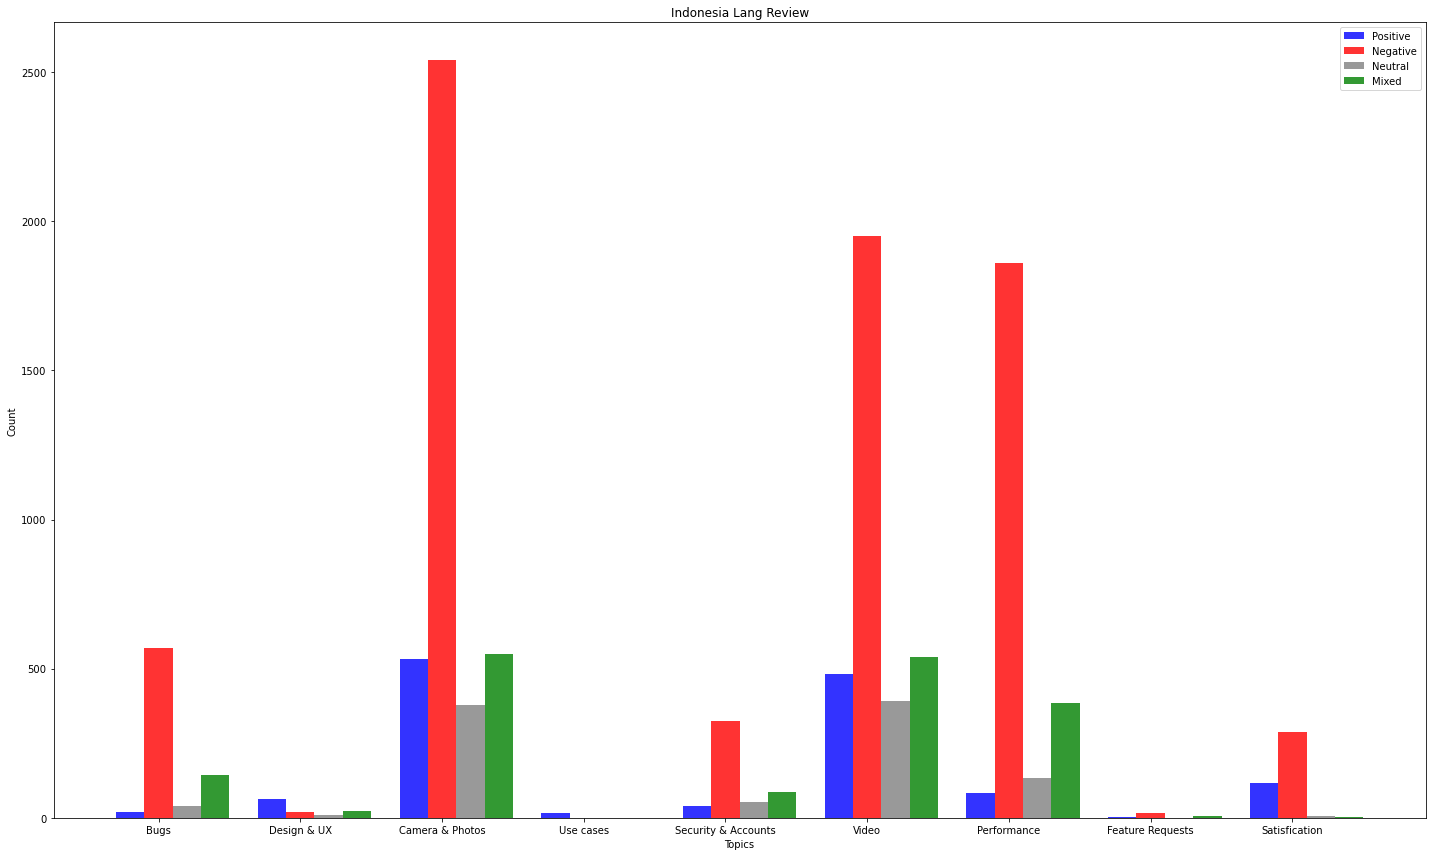

In [18]:
visualize_data(df_id, 'Indonesia Lang Review')

### Visualize English Langs Review

In [19]:
visualize_data(df_en, 'English Lang Review')

## Preprocessing

### WordNet Lemmatizer

In [20]:
from nltk.stem import PorterStemmer

stemmer = WordNetLemmatizer()
porter=PorterStemmer()

### Random value X and Y

In [21]:
y_start = np.array(df.Sentiment)
X_start = np.array(df.content)

# Shuffle data
indices = np.arange(len(X_start))
np.random.shuffle(indices)
X_start = X_start[indices]
y_start = y_start[indices]

print("Length of X: " + str(len(X_start)))
print("Length of Y: " + str(len(y_start)))

# Keep 10%
# X = X_start[:int(len(X_start) * 0.9)]
# y = y_start[:int(len(y_start) * 0.9)]
X = X_start
y = y_start

Length of X: 147685
Length of Y: 147685


### Content Before Processed

In [22]:
X[30]

"hi, theirs a glitch where sometimes if you post a story it'll be stuch on the loading screen and you can't do anything unless you uninstall the app. please fix!!!!!!!!"

### Process the comment
*   Remove special characters, single characters and multiple spaces
*   Convert to lowercase
*   Using WordNet Lemmatizer to stemming



In [23]:
from string import punctuation

comments = []

for i in range(len(X)):
  comment = X[i]

  try:
    # remove all single characters
    # comment = re.sub(r'\s+[a-zA-Z]\s+', ' ', comment)
    comment = ''.join([c for c in comment if c not in punctuation])
  except:
    print("Broken in step 1: " + str(comment))

  try:
    # Substituting multiple spaces with single space
    comment = re.sub(r'\s+', ' ', comment, flags=re.I)
  except:
    print("Broken in step 2: " + str(comment))

  try:
    # Converting to Lowercase
    comment = comment.lower()
  except:
    print("Broken in step 3: " + str(comment))

  try:
    # Lemmatization
    comment = comment.split()

    # comment = [stemmer.lemmatize(word) for word in comment]
    comment = [porter.stem(word) for word in comment]
    comment = ' '.join(comment)
  except: 
    print("Broken in step 4: " + str(comment))

  comments.append(str(comment))

In [24]:
comments[30]

'hi their a glitch where sometim if you post a stori itll be stuch on the load screen and you cant do anyth unless you uninstal the app pleas fix'

### Split dataset 
Train (70%) & Development (10%) & Test (20%)

In [25]:
def get_one_hot(targets, nb_classes):
    res = np.eye(nb_classes)[np.array(targets).reshape(-1)]
    return res.reshape(list(targets.shape)+[nb_classes])

In [26]:
X_train, X_dev, X_test = comments[:int(len(comments) * 0.7)], comments[int(len(comments) * 0.7) + 1:int(len(comments) * 0.8)], comments[int(len(comments) * 0.8) + 1:int(len(comments))]
y_train, y_dev, y_test = y[:int(len(y) * 0.7)], y[int(len(y) * 0.7) + 1:int(len(y) * 0.8)], y[int(len(y) * 0.8) + 1:int(len(y))]

y_train = get_one_hot(y_train, 3)

y_dev = get_one_hot(y_dev, 3)

y_test = get_one_hot(y_test, 3)

### Download & unzip fasttext word embeddings

In [27]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.vec.gz
!gzip -d cc.en.300.vec.gz

'wget' is not recognized as an internal or external command,
operable program or batch file.
'gzip' is not recognized as an internal or external command,
operable program or batch file.


### Load fasttext embeddings
To load fasttext pre-trained embeddings more efficiently, we can read only once the embeddings file and save:
* A 2D np-array for the embedding vectors
* A dictionary that maps each word to the row index of its embedding on the 2D np-array

In [28]:
import pickle
idx = 0
vocab = {}

# try:
#   with open("fasttext.npy", 'r') as f:
#     print("Already Exist")
# except:
with open("cc.en.300.vec", 'r', encoding="utf-8", newline='\n', errors='ignore') as f:
  for l in f:
    line = l.rstrip().split(' ')
    if idx == 0:
      vocab_size = int(line[0]) + 2
      dim = int(line[1])
      vecs = np.zeros(vocab_size*dim).reshape(vocab_size,dim)
      vocab["__PADDING__"] = 0
      vocab["__UNK__"] = 1
      idx = 2
    else:
      vocab[line[0]] = idx
      emb = np.array(line[1:]).astype(np.float)
      if (emb.shape[0] == dim):
        vecs[idx,:] = emb
        idx+=1
      else:
        continue
  pickle.dump(vocab,open("fasttext_voc",'wb'))
  np.save("fasttext.npy",vecs)

Already Exist


### Load embeddings np-array and mapping dictionary

In [29]:
fasttext_embed = np.load("fasttext.npy")
fasttext_word_to_index = pickle.load(open("fasttext_voc", 'rb'))

In [30]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

MAX_WORDS = 20000
MAX_SEQUENCE_LENGTH = 200
EMBEDDING_DIM = fasttext_embed.shape[1]

tokenizer = Tokenizer(num_words=MAX_WORDS,oov_token='__UNK__')
tokenizer.fit_on_texts(X_train)

train_seqs = tokenizer.texts_to_sequences(X_train)
train_data = pad_sequences(train_seqs, maxlen=MAX_SEQUENCE_LENGTH,padding='post')

dev_seqs = tokenizer.texts_to_sequences(X_dev)
dev_data = pad_sequences(dev_seqs, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

test_seqs = tokenizer.texts_to_sequences(X_test)
test_data = pad_sequences(test_seqs, maxlen=MAX_SEQUENCE_LENGTH,padding='post')

C:\Users\R4P\anaconda3\envs\SentimentAnalysis\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [31]:
train_data

array([[ 173,  965,  147, ...,    0,    0,    0],
       [   2, 5175,   14, ...,    0,    0,    0],
       [   3,   78,  172, ...,    0,    0,    0],
       ...,
       [   3,  406,   16, ...,    0,    0,    0],
       [  28,   29,   55, ...,    0,    0,    0],
       [  15,   10,   35, ...,    0,    0,    0]])

In [32]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 30982 unique tokens.


### Initialize embedding matrix with fasttext pre-trained embedings

In [33]:
embedding_matrix = np.zeros((MAX_WORDS+2, EMBEDDING_DIM))
for word, i in word_index.items():
  if i > MAX_WORDS:
    continue
  try:
    embedding_vector = fasttext_embed[fasttext_word_to_index[word],:]
    embedding_matrix[i] = embedding_vector
  except:
    pass

### Initialize GPU

In [34]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2619801652759909594
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3140970086
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13898866153692876014
physical_device_desc: "device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [35]:
import tensorflow as tf
# sess = tf.compat.v1.Session()

tf_config = tf.compat.v1.ConfigProto(allow_soft_placement=False)
# tf_config = tf.compat.v1.ConfigProto()
tf_config.gpu_options.allow_growth = True
s = tf.compat.v1.Session(config=tf_config)
tf.compat.v1.keras.backend.set_session(s)

In [36]:
from keras import backend as K
tf.config.list_physical_devices('GPU')
# K.tensorflow_backend._get_available_gpus()

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Defining Model

In [37]:
# model.add(Embedding(MAX_WORDS+2, EMBEDDING_DIM, weights=[embedding_matrix],input_length=MAX_SEQUENCE_LENGTH, mask_zero=True, trainable=False))
# Use train_data, y_train for training, dev_data, y_dev for validation data and test_data, y_test for testing/predic

import keras
from keras.layers import Dense, Embedding, GRU, Dropout, Bidirectional, SpatialDropout1D, concatenate
from keras.callbacks import ModelCheckpoint

In [38]:
# train_data.shape[0]
with tf.device('/device:GPU:0'):
    model_1_input = keras.Input(shape=(MAX_SEQUENCE_LENGTH,))
    embedding = Embedding(MAX_WORDS+2, EMBEDDING_DIM, weights=[embedding_matrix],input_length=MAX_SEQUENCE_LENGTH, mask_zero=True, trainable=False)(model_1_input)
    dropout_1 = Dropout(0.2, name="dropout_1")(embedding)
    bi_gru_1 = Bidirectional(GRU(100, return_sequences=False, recurrent_dropout = 0.2))(dropout_1)
    dropout_21 = Dropout(0.2, name="dropout_21")(bi_gru_1)
    dense_11 = Dense(MAX_SEQUENCE_LENGTH, activation='relu', name="Dense_11")(dropout_21)
    dropout_3 = Dropout(0.2, name="dropout_3")(dense_11)
    dense_2 = Dense(75, activation='relu', name="Dense_2")(dropout_3)
    model_1_output = Dense(3, activation='softmax', name="model_1_output")(dense_2)
    model_1 = keras.Model(model_1_input, model_1_output, name="Model_BiGRU")
    model_1.summary()

Model: "Model_BiGRU"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 200, 300)          6000600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 200, 300)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               240600    
_________________________________________________________________
dropout_21 (Dropout)         (None, 200)               0         
_________________________________________________________________
Dense_11 (Dense)             (None, 200)               40200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               

In [39]:
def recall(y_true, y_pred):
  """
  Recall metric.
  Only computes a batch-wise average of recall.
  Computes the recall, a metric for multi-label classification of
  how many relevant items are selected.
  """
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
  recall = true_positives / (possible_positives + K.epsilon())
  return recall

def precision(y_true, y_pred):
  """
  Precision metric.
  Only computes a batch-wise average of precision.
  Computes the precision, a metric for multi-label classification of
  how many selected items are relevant.
  Source
  ------
  https://github.com/fchollet/keras/issues/5400#issuecomment-314747992
  """
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
  precision = true_positives / (predicted_positives + K.epsilon())
  return precision

def f1(y_true, y_pred):
  """Calculate the F1 score."""
  p = precision(y_true, y_pred)
  r = recall(y_true, y_pred)
  return 2 * ((p * r) / (p + r))

def accuracy(y_true, y_pred):
  return K.mean(K.equal(y_true, K.round(y_pred)), axis=1)

In [40]:
from keras.optimizers import Adam

with tf.device('/device:GPU:0'):
    # model_1.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=[accuracy, recall, precision, f1])

    model_1.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=[accuracy, f1])

    checkpoint = ModelCheckpoint('keras_BiGRU_model', monitor='val_f1', verbose=1, save_best_only=True, mode='max')


In [41]:
with tf.device('/device:GPU:0'):
    # h = model.fit(train_data, y_train, validation_data=(dev_data, y_dev), epochs=2, batch_size=512, verbose=1, shuffle=False, use_multiprocessing=True, workers=8)
    h = model_1.fit(train_data, y_train,
                    batch_size = 512,
                    epochs = 5,
                    verbose = True,
                    callbacks=[checkpoint],
                    validation_data=(dev_data, y_dev),
                    shuffle=False,
                    use_multiprocessing=True, 
                    workers=8)

Train on 103379 samples, validate on 14768 samples
Epoch 1/5
103379/103379 [==============================] - 138s 1ms/step - loss: 0.7023 - accuracy: 0.8148 - f1: nan - val_loss: 0.5510 - val_accuracy: 0.8778 - val_f1: 0.8053

In [42]:
with tf.device('/device:GPU:0'):
    results = model_1.evaluate(test_data, y_test, batch_size=128)
    print('test loss, test acc:', results)


29536/29536 [==============================] - 20s 677us/step

In [43]:
h.history
plt.plot(h.history["loss"])
plt.plot(h.history["val_loss"])
plt.legend(["training","validation"])
plt.xlabel("epoch")
plt.title("Loss")

Text(0.5, 1.0, 'Loss')

In [44]:
h.history
plt.plot(h.history["accuracy"])
plt.plot(h.history["val_accuracy"])
plt.legend(["training","validation"])
plt.xlabel("epoch")
plt.title("Accuracy")

Text(0.5, 1.0, 'Accuracy')

### Validation
Using last generated model

In [45]:
from sklearn.metrics import log_loss, accuracy_score
import scikitplot.plotters as skplt
from keras.models import load_model

In [46]:
model = load_model('keras_BiGRU_model', custom_objects={"f1": f1, "K": K})

Log loss: 0.437680809470951
Accuracy: 0.8462554171180932


C:\Users\R4P\anaconda3\envs\SentimentAnalysis\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


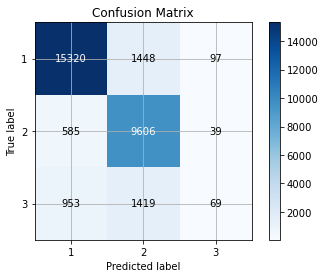

In [47]:
with tf.device('/device:GPU:0'):
    probas = model.predict(test_data)
    pred_indices = np.argmax(probas, axis=1)
    classes = np.array(range(1, 4))
    preds = classes[pred_indices]
    print('Log loss: {}'.format(log_loss(classes[np.argmax(y_test, axis=1)], probas)))
    print('Accuracy: {}'.format(accuracy_score(classes[np.argmax(y_test, axis=1)], preds)))
    skplt.plot_confusion_matrix(classes[np.argmax(y_test, axis=1)], preds)

In [48]:
df_validation = pd.DataFrame()
df_validation['content'] = pd.Series(X_test)
df_validation['prediction'] = pd.Series(np.argmax(probas, axis=1)).map({SENTIMENT_NEUTRAL: 'NEUTRAL', SENTIMENT_NEGATIVE: 'NEGATIVE', SENTIMENT_MIXED: 'MIXED', SENTIMENT_POSITIVE: 'POSITIVE'})
df_validation['ground_truth'] = pd.Series(np.argmax(y_test, axis=1)).map({SENTIMENT_NEUTRAL: 'NEUTRAL', SENTIMENT_NEGATIVE: 'NEGATIVE', SENTIMENT_MIXED: 'MIXED', SENTIMENT_POSITIVE: 'POSITIVE'})
df_validation.sample(50)


content prediction  \
9012   nice platform you for grow channel or popular ...   POSITIVE   
18407  thank to instagram for fix the theme issu i am...   POSITIVE   
14153  i have tri make contact with instagram sever t...   NEGATIVE   
14280  do a daili week patchinclud fix account and th...   NEGATIVE   
1140                      noth to say everyth is perfect   NEGATIVE   
25064  my filter wont load ive tri everyth to fix the...   NEGATIVE   
1122               great way to connect with your commun   POSITIVE   
18430                          pleas add marathi languag   NEGATIVE   
5820   my instagram ha been significantli less effici...   NEGATIVE   
2748        there is so mani fake account who share hoak   NEGATIVE   
16105                         incred and beauti is super   POSITIVE   
110    is so good there ao much idea for pictur every...   POSITIVE   
26932  it wont allow you to make an account thi app suck   NEGATIVE   
16049  after i updat thi app thi thing veri lag and s...   NEGATIVE   
26007  stori is blur when insta first ad stori fictio...   NEGATIVE   
25899                                          to beauti   POSITIVE   
19576  yeah it realli cool app i liter love it the on...   POSITIVE   
11846  best social media app to commun with friend an...   POSITIVE   
2792                 not show imag thumbnail when upload   NEGATIVE   
7078   stop work correctli and i tri my best to fix i...   NEGATIVE   
17715  there is a problem when i post a video it beco...   NEGATIVE   
21037  repost stori stuck and stuck and stuck i have ...   NEGATIVE   
3382   thi app got great stuff about it but it keep b...   NEGATIVE   
1900   there no featur to disabl video autoplay it co...   NEGATIVE   
25941                 excel app for share picvideomsgetv   POSITIVE   
12225  for so long i am tri to connect to instagram b...   NEGATIVE   
18262                                          veri nice   POSITIVE   
9597                              well it just a problem   POSITIVE   
17356  cool app you can complet chang and show ur att...   POSITIVE   
6110                        sometim it doesnt play video   NEGATIVE   
25224           we are unabl to hide the stori too worst   NEGATIVE   
25595  i post a photo then cannot refreshkeep ask for...   NEGATIVE   
14419                                      no video play   NEGATIVE   
10958  i keep uninstal and reinstal it wont updat the...   NEGATIVE   
6382   is a great social media platform great for ins...    NEUTRAL   
28796  when i wa follow peopl immedi action block app...   NEGATIVE   
4010   my account dm arent load and i dont know the i...   NEGATIVE   
17564                                       sweet to use   POSITIVE   
1670   one of my account doesnt have the add post to ...   NEGATIVE   
20792  easi to discov what the world is about and red...   POSITIVE   
24765  pleas fix my ig peopl that reshar my ig video ...   NEGATIVE   
21000  my account get temporari block from like everi...   NEGATIVE   
25380  i love the app but i have to hold my phone ups...   POSITIVE   
7003   it is one of the most spectacular applic becau...   POSITIVE   
21473  i love it it okay so and you can follow me fro...   POSITIVE   
6109   great app but right now i am not abl to use th...   POSITIVE   
17182  great social network to show and see beauti pi...   POSITIVE   
9322   good app sorri i keep chang it it just that it...   POSITIVE   
3795                           good to commun with peopl   POSITIVE   
11468         i like veri much becaus it veri use for me   POSITIVE   

      ground_truth  
9012      POSITIVE  
18407     POSITIVE  
14153     NEGATIVE  
14280      NEUTRAL  
1140      POSITIVE  
25064     NEGATIVE  
1122      POSITIVE  
18430      NEUTRAL  
5820      NEGATIVE  
2748      NEGATIVE  
16105     POSITIVE  
110       POSITIVE  
26932     NEGATIVE  
16049     NEGATIVE  
26007     NEGATIVE  
25899     POSITIVE  
19576     POSITIVE  
11846     POSITIVE  
2792      NEGATIVE  
7078   